## Everything in one Set

Change your models in their definition and run the test

In [2]:
from neuron import h, gui
import numpy as np
import copy
from importlib import reload
from helpers import ap, rheobase, generic, stimulation, rmp, phase, ih
from cells.hallermann2012 import iteration2

reload(iteration2)
reload(generic)
reload(rmp)
config = iteration2.Config()

def Sham():
    config = iteration2.Config()
    config.celsius = 37
    return iteration2.SPI6(config)


cellbuilder = Sham

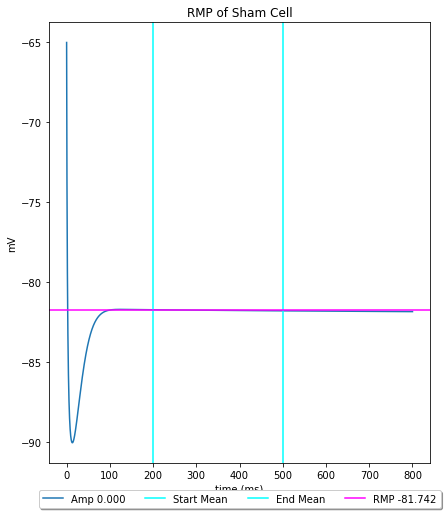

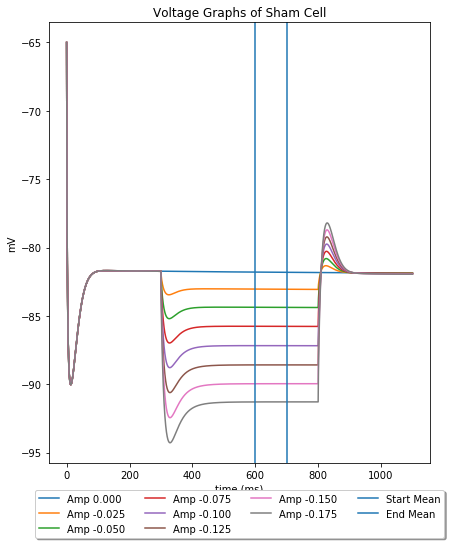

Intial guess -0.2
Running in range  0.6000000000000001 from  -0.2 to  0.4000000000000001
Detected first AP at 0.22000000000000008  [mv]
Intial guess 0.22000000000000008
Running in range  0.06600000000000003 from  0.15400000000000005 to  0.28600000000000014
Detected first AP at 0.19690000000000007  [mv]


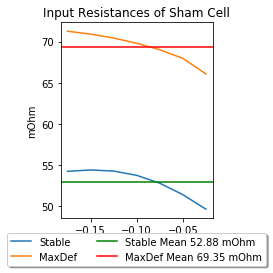

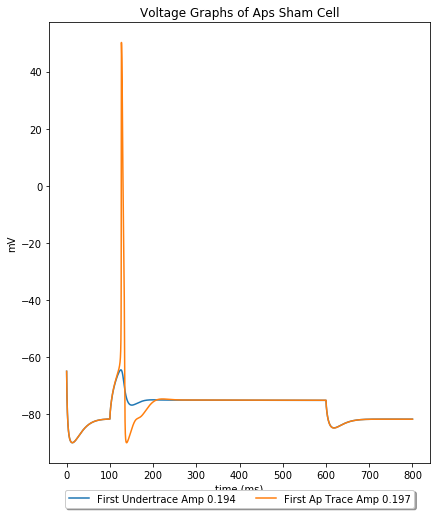

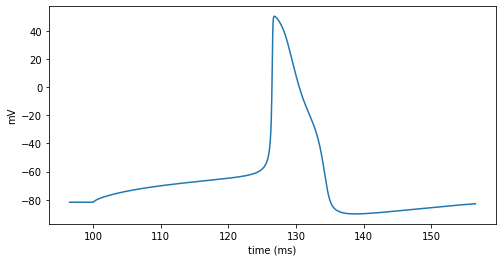

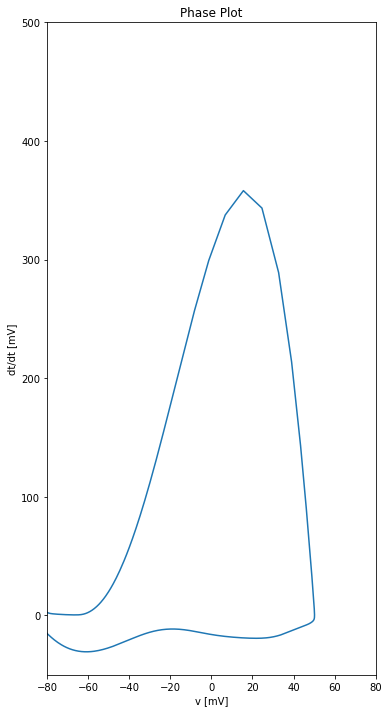

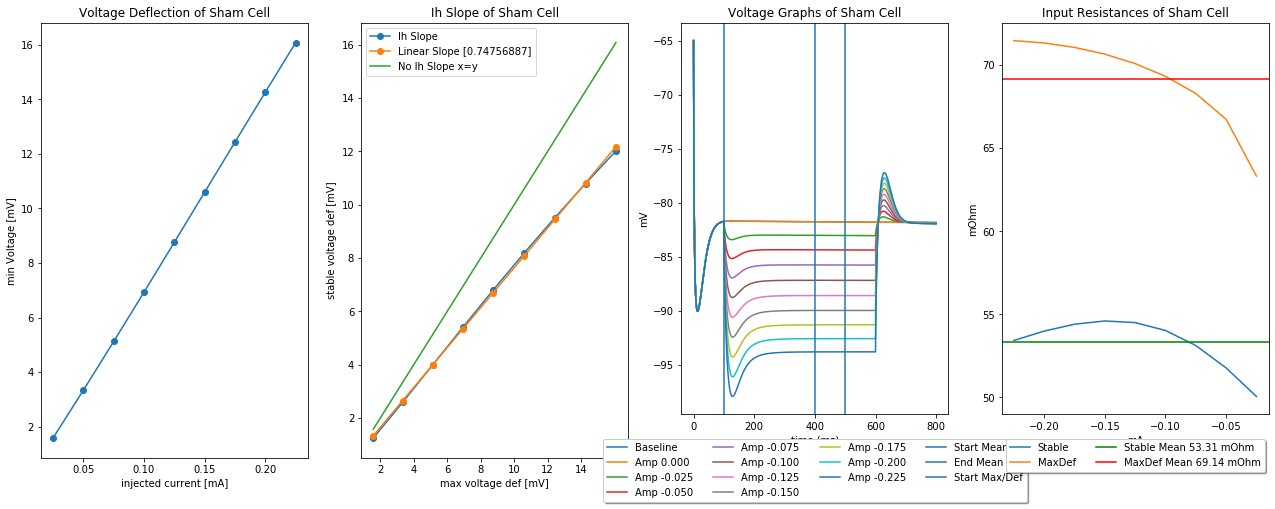

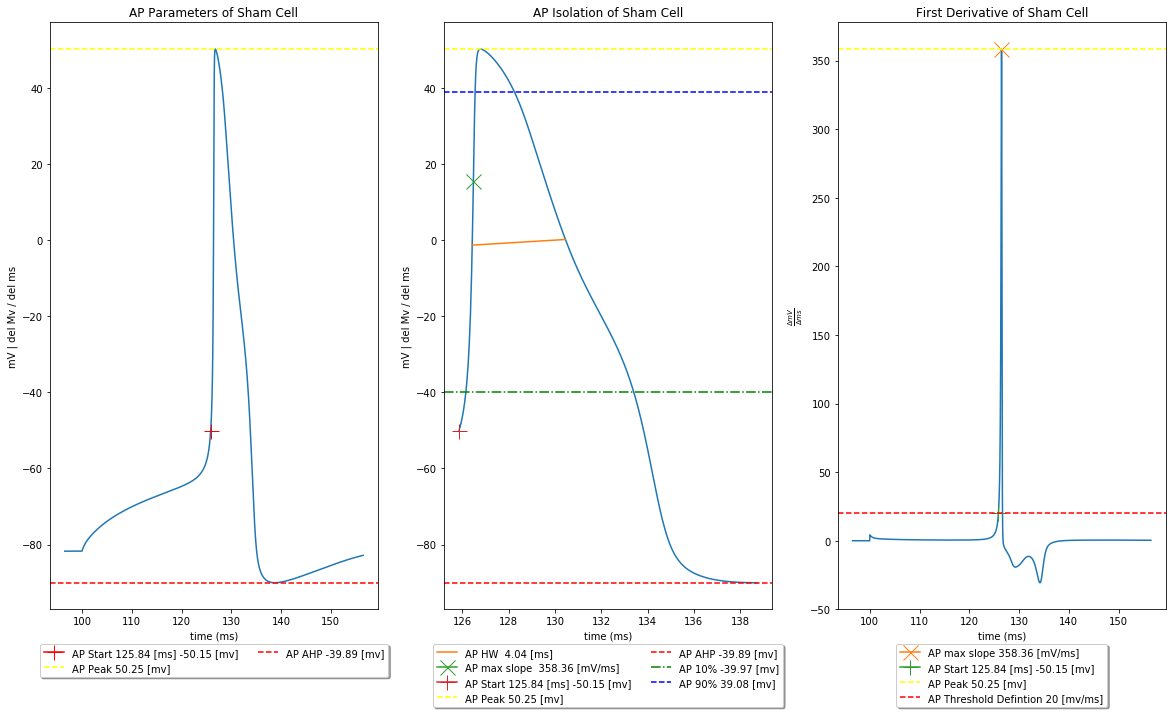

In [3]:
rmp.calculateRMP(cellbuilder, plot=True)
generic.calculateInputResistance(cellbuilder, mult=-0.025, iterations=8, plot=True, delay=300, duration=500)
undertrace, overtrace = rheobase.calculateRheobase(cellbuilder, precisiondigits=2, plot=True)

#foundtrace = ap.findFirstApWithinMS(cellbuilder, ms= 15) #is for the approach to get the first ap within ms
aptime = overtrace["aps"][0]
aptrace = generic.isolateTime(overtrace, aptime,30)

generic.plotTrace(aptrace)
phase.phasePlanePlot(aptrace)

ih.calculateInputResistanceAndIhSag(cellbuilder)
aptracewithparams = ap.calculateAPThresholdAndDerivative(aptrace)
ap.plotApParameters(aptracewithparams, deriv=True)